<a href="https://colab.research.google.com/github/abuqaiselegant/BreastCancerPrediction_ML_Coursework/blob/main/ML_assignment2_data_prep_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# insert a dataframe object
df = pd.DataFrame(pd.read_excel("TrainDataset2024.xls"))
df = df.drop("ID", axis=1)  # prevent model using ID to predict
df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [ ]:
# declare sets of column namefor future use

# Define output column name
clf_output_column_name = "pCR (outcome)"
reg_output_column_name = "RelapseFreeSurvival (outcome)"

# Define feature column names
features = list(df.columns.copy())
if clf_output_column_name in features:
    features.remove(clf_output_column_name)
if reg_output_column_name in features:
    features.remove(reg_output_column_name)
print(f'features({len(features)}):{features}')

# Define set of clinical feature column name
clinical_features = [
    "Age",
    "ER",
    "PgR",
    "HER2",
    "TrippleNegative",
    "ChemoGrade",
    "Proliferation",
    "HistologyType",
    "LNStatus",
    "TumourStage",
    "Gene",
]
print(f"clinical features({len(clinical_features)}): {clinical_features}")

# Define set of MRI feature column name
MRI_features = [
    "original_shape_Elongation",
    "original_shape_Flatness",
    "original_shape_LeastAxisLength",
    "original_shape_MajorAxisLength",
    "original_shape_Maximum2DDiameterColumn",
    "original_shape_Maximum2DDiameterRow",
    "original_shape_Maximum2DDiameterSlice",
    "original_shape_Maximum3DDiameter",
    "original_shape_MeshVolume",
    "original_shape_MinorAxisLength",
    "original_shape_Sphericity",
    "original_shape_SurfaceArea",
    "original_shape_SurfaceVolumeRatio",
    "original_shape_VoxelVolume",
    "original_firstorder_10Percentile",
    "original_firstorder_90Percentile",
    "original_firstorder_Energy",
    "original_firstorder_Entropy",
    "original_firstorder_InterquartileRange",
    "original_firstorder_Kurtosis",
    "original_firstorder_Maximum",
    "original_firstorder_MeanAbsoluteDeviation",
    "original_firstorder_Mean",
    "original_firstorder_Median",
    "original_firstorder_Minimum",
    "original_firstorder_Range",
    "original_firstorder_RobustMeanAbsoluteDeviation",
    "original_firstorder_RootMeanSquared",
    "original_firstorder_Skewness",
    "original_firstorder_TotalEnergy",
    "original_firstorder_Uniformity",
    "original_firstorder_Variance",
    "original_glcm_Autocorrelation",
    "original_glcm_ClusterProminence",
    "original_glcm_ClusterShade",
    "original_glcm_ClusterTendency",
    "original_glcm_Contrast",
    "original_glcm_Correlation",
    "original_glcm_DifferenceAverage",
    "original_glcm_DifferenceEntropy",
    "original_glcm_DifferenceVariance",
    "original_glcm_Id",
    "original_glcm_Idm",
    "original_glcm_Idmn",
    "original_glcm_Idn",
    "original_glcm_Imc1",
    "original_glcm_Imc2",
    "original_glcm_InverseVariance",
    "original_glcm_JointAverage",
    "original_glcm_JointEnergy",
    "original_glcm_JointEntropy",
    "original_glcm_MCC",
    "original_glcm_MaximumProbability",
    "original_glcm_SumAverage",
    "original_glcm_SumEntropy",
    "original_glcm_SumSquares",
    "original_gldm_DependenceEntropy",
    "original_gldm_DependenceNonUniformity",
    "original_gldm_DependenceNonUniformityNormalized",
    "original_gldm_DependenceVariance",
    "original_gldm_GrayLevelNonUniformity",
    "original_gldm_GrayLevelVariance",
    "original_gldm_HighGrayLevelEmphasis",
    "original_gldm_LargeDependenceEmphasis",
    "original_gldm_LargeDependenceHighGrayLevelEmphasis",
    "original_gldm_LargeDependenceLowGrayLevelEmphasis",
    "original_gldm_LowGrayLevelEmphasis",
    "original_gldm_SmallDependenceEmphasis",
    "original_gldm_SmallDependenceHighGrayLevelEmphasis",
    "original_gldm_SmallDependenceLowGrayLevelEmphasis",
    "original_glrlm_GrayLevelNonUniformity",
    "original_glrlm_GrayLevelNonUniformityNormalized",
    "original_glrlm_GrayLevelVariance",
    "original_glrlm_HighGrayLevelRunEmphasis",
    "original_glrlm_LongRunEmphasis",
    "original_glrlm_LongRunHighGrayLevelEmphasis",
    "original_glrlm_LongRunLowGrayLevelEmphasis",
    "original_glrlm_LowGrayLevelRunEmphasis",
    "original_glrlm_RunEntropy",
    "original_glrlm_RunLengthNonUniformity",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_glrlm_RunPercentage",
    "original_glrlm_RunVariance",
    "original_glrlm_ShortRunEmphasis",
    "original_glrlm_ShortRunHighGrayLevelEmphasis",
    "original_glrlm_ShortRunLowGrayLevelEmphasis",
    "original_glszm_GrayLevelNonUniformity",
    "original_glszm_GrayLevelNonUniformityNormalized",
    "original_glszm_GrayLevelVariance",
    "original_glszm_HighGrayLevelZoneEmphasis",
    "original_glszm_LargeAreaEmphasis",
    "original_glszm_LargeAreaHighGrayLevelEmphasis",
    "original_glszm_LargeAreaLowGrayLevelEmphasis",
    "original_glszm_LowGrayLevelZoneEmphasis",
    "original_glszm_SizeZoneNonUniformity",
    "original_glszm_SizeZoneNonUniformityNormalized",
    "original_glszm_SmallAreaEmphasis",
    "original_glszm_SmallAreaHighGrayLevelEmphasis",
    "original_glszm_SmallAreaLowGrayLevelEmphasis",
    "original_glszm_ZoneEntropy",
    "original_glszm_ZonePercentage",
    "original_glszm_ZoneVariance",
    "original_ngtdm_Busyness",
    "original_ngtdm_Coarseness",
    "original_ngtdm_Complexity",
    "original_ngtdm_Contrast",
    "original_ngtdm_Strength",
]
print(f"MRI features({len(MRI_features)}): {MRI_features}")

# Create a MRI feature group dictionary
MRI_group_dict: dict[str, list[str]] = {}

for feature in MRI_features:
    split_f = feature.split("_")

    key = "_".join([split_f[0], split_f[1]])

    if not MRI_group_dict.get(key):
        MRI_group_dict[key] = [feature]
    else:
        MRI_group_dict[key].append(feature)

for k, v in MRI_group_dict.items():
    print(f"{k}({len(v)}): {v}")

# Define group of feature base on data type (continuous and categorical)
features_continuous = ["Age"] + MRI_features
features_categorical = list(set(features) - set(features_continuous))

print(f"continuous({len(features_continuous)}): {features_continuous}")
print(f"categorical({len(features_categorical)}): {features_categorical}")

features(118):['Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'Gene', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_fi

In [ ]:
import numpy as np
from typing import Literal

# Define methods available for handle outliers
handle_outlier_methods = Literal["iqr", "zscore"]

# Detect outliers and change them to NaN
def handle_outlier(df: pd.DataFrame, method: handle_outlier_methods) -> pd.DataFrame:
    df_na = df.copy()

    # Using IQR to detect outliers
    if method == "iqr":
        # Check every MRI featueres
        for feature in MRI_features:
            Q1 = df_na[feature].quantile(0.25)
            Q3 = df_na[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Set outliers to NaN
            df_na[feature] = np.where(
                (df_na[feature] < lower_bound) | (df_na[feature] > upper_bound),
                np.nan,
                df_na[feature],
            )
    # Using Modified Z-score to detect outliers
    elif method == "zscore":
        threshold = 3.5  # z-score threshold
        for feature in MRI_features:
            median = df_na[feature].median()
            mad = np.median(
                np.abs(df_na[feature] - median)
            )  # Median absolute deviation
            z_score = 0.6745 * (df_na[feature] - median) / mad
            df_na[feature] = np.where(
                np.abs(z_score) > threshold,
                np.nan,
                df_na[feature],
            )

    return df_na

df_prep = handle_outlier(df,'iqr')

,0
Age,"Axes(0.125,0.747241;0.133621x0.132759)"
ER,"Axes(0.285345,0.747241;0.133621x0.132759)"
PgR,"Axes(0.44569,0.747241;0.133621x0.132759)"
HER2,"Axes(0.606034,0.747241;0.133621x0.132759)"
TrippleNegative,"Axes(0.766379,0.747241;0.133621x0.132759)"
ChemoGrade,"Axes(0.125,0.587931;0.133621x0.132759)"
Proliferation,"Axes(0.285345,0.587931;0.133621x0.132759)"
HistologyType,"Axes(0.44569,0.587931;0.133621x0.132759)"
LNStatus,"Axes(0.606034,0.587931;0.133621x0.132759)"
TumourStage,"Axes(0.766379,0.587931;0.133621x0.132759)"


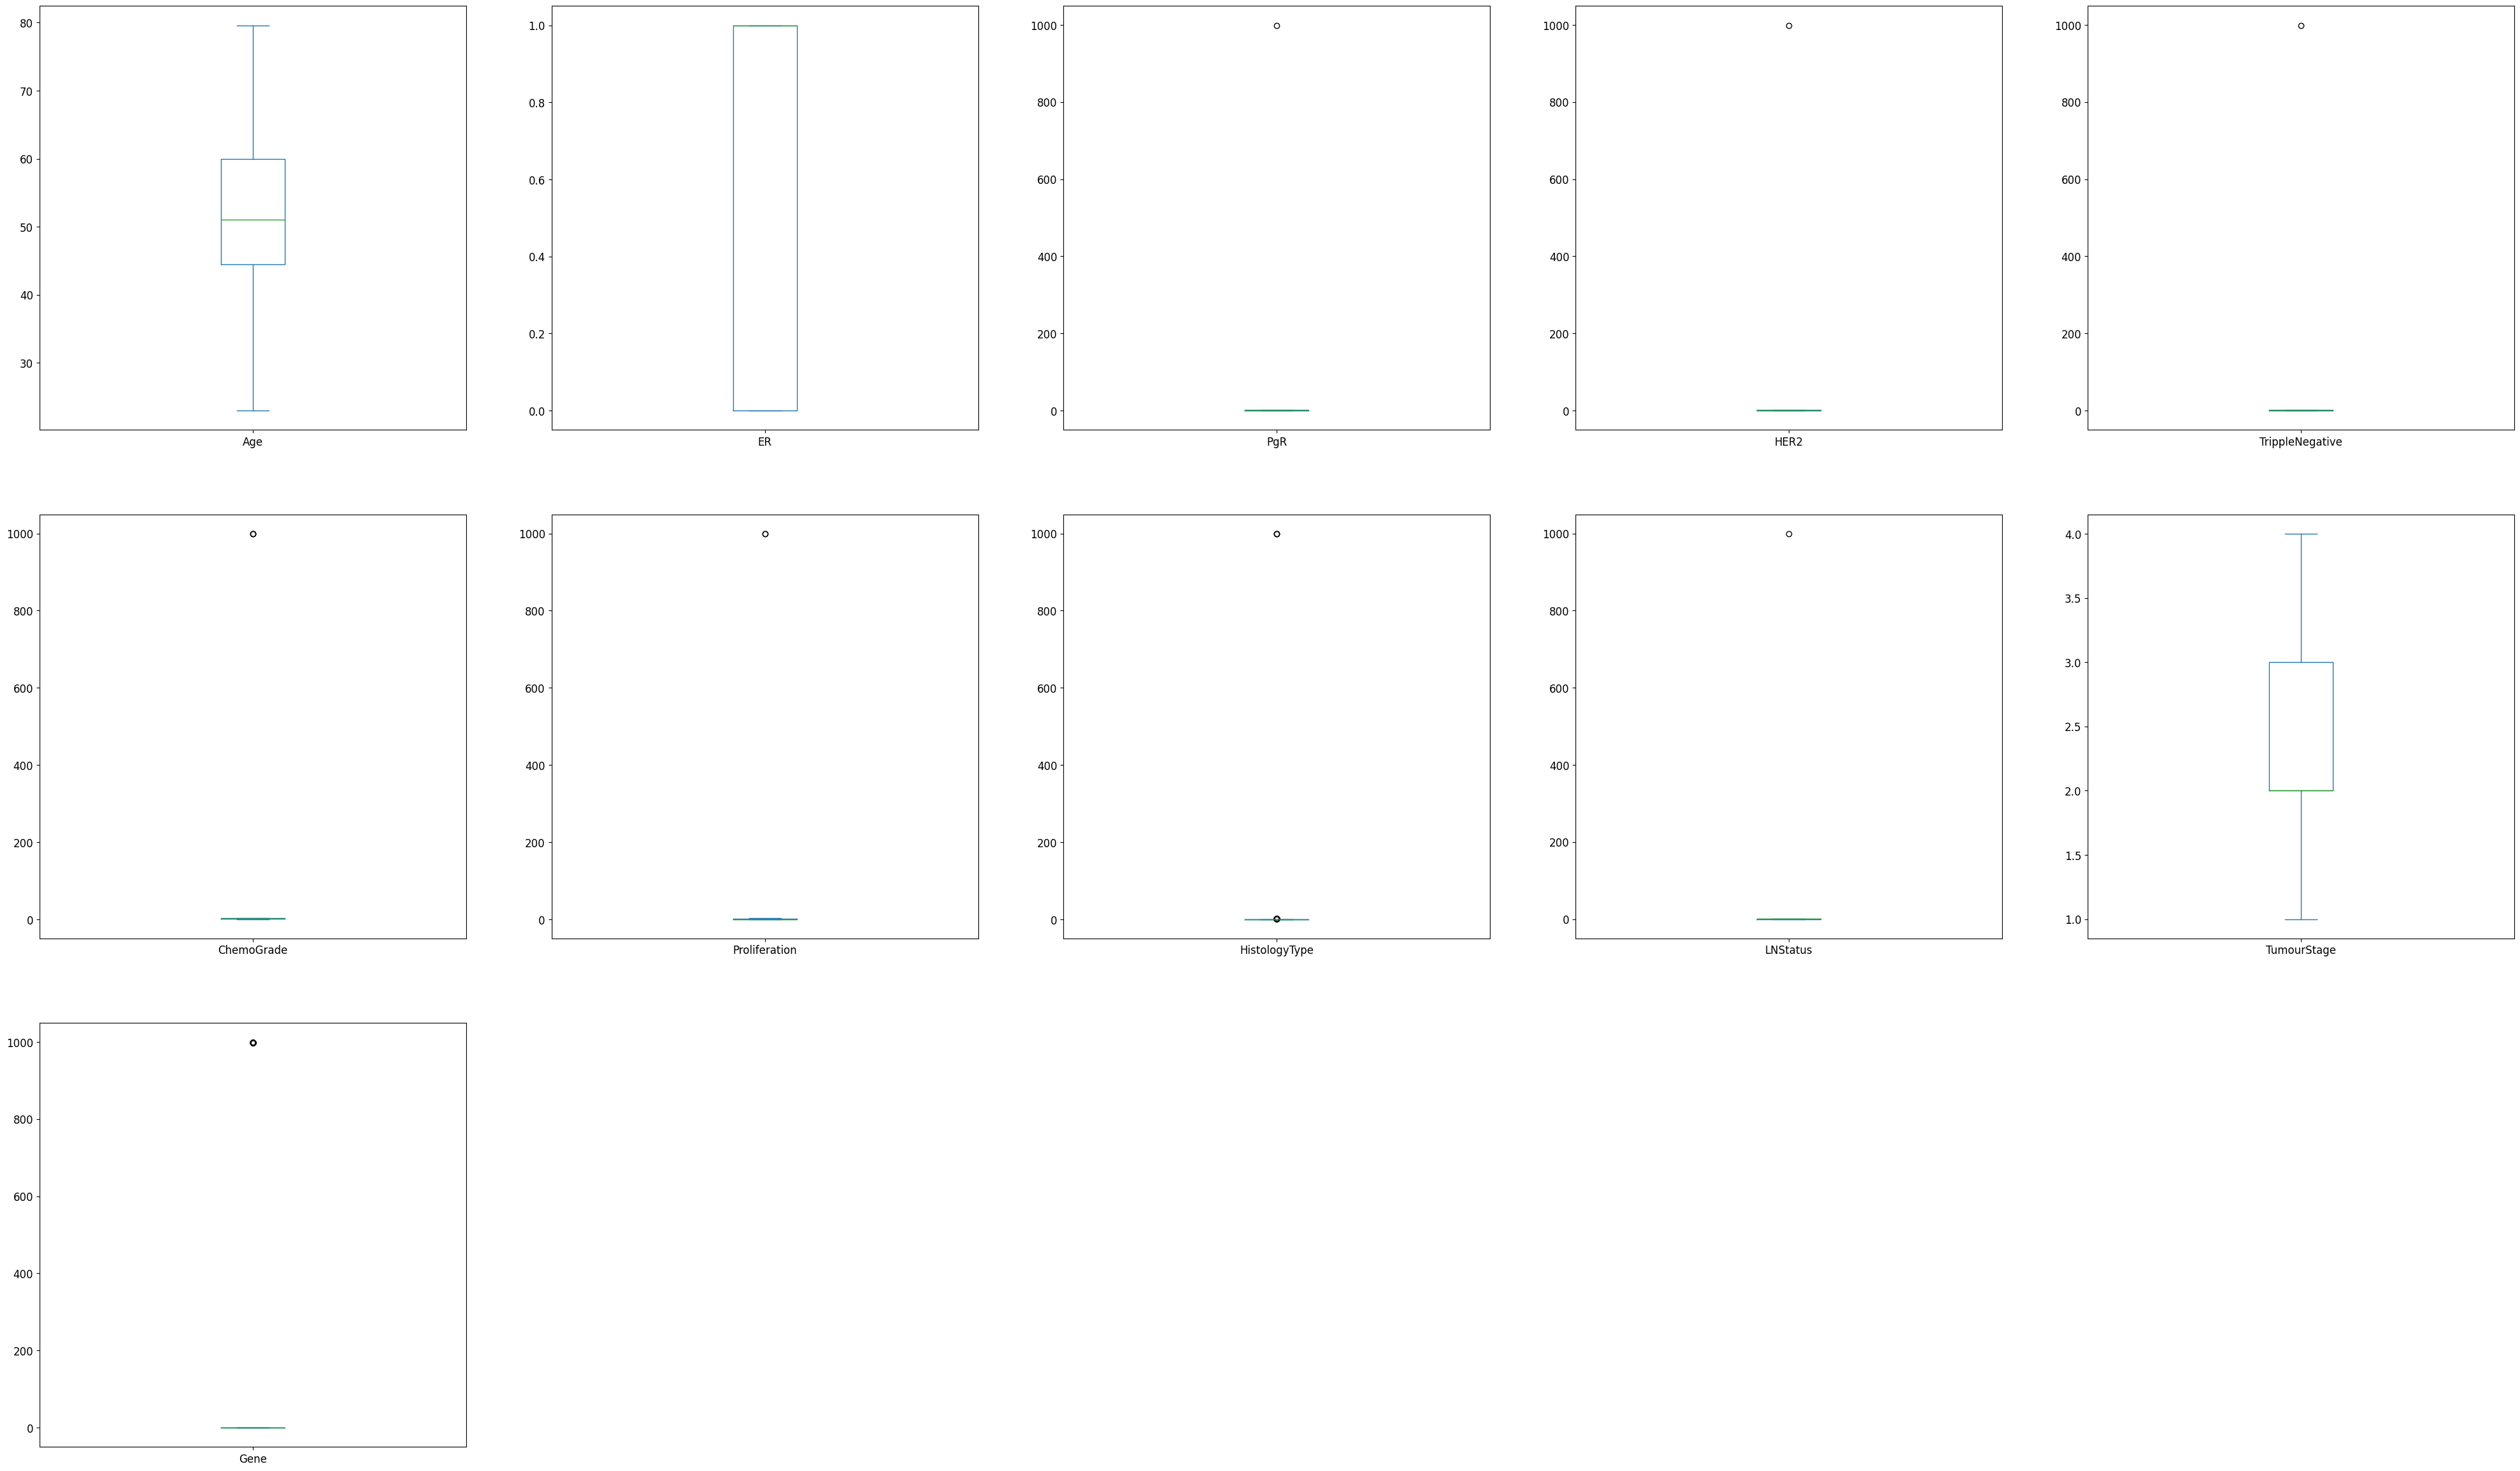

In [ ]:
df_prep[clinical_features].plot(
    kind="box",
    subplots=True,
    layout=(5, 5),
    sharex=False,
    sharey=False,
    fontsize=12,
    figsize=(50, 50),
)

,0
original_ngtdm_Busyness,"Axes(0.125,0.747241;0.133621x0.132759)"
original_ngtdm_Coarseness,"Axes(0.285345,0.747241;0.133621x0.132759)"
original_ngtdm_Complexity,"Axes(0.44569,0.747241;0.133621x0.132759)"
original_ngtdm_Contrast,"Axes(0.606034,0.747241;0.133621x0.132759)"
original_ngtdm_Strength,"Axes(0.766379,0.747241;0.133621x0.132759)"


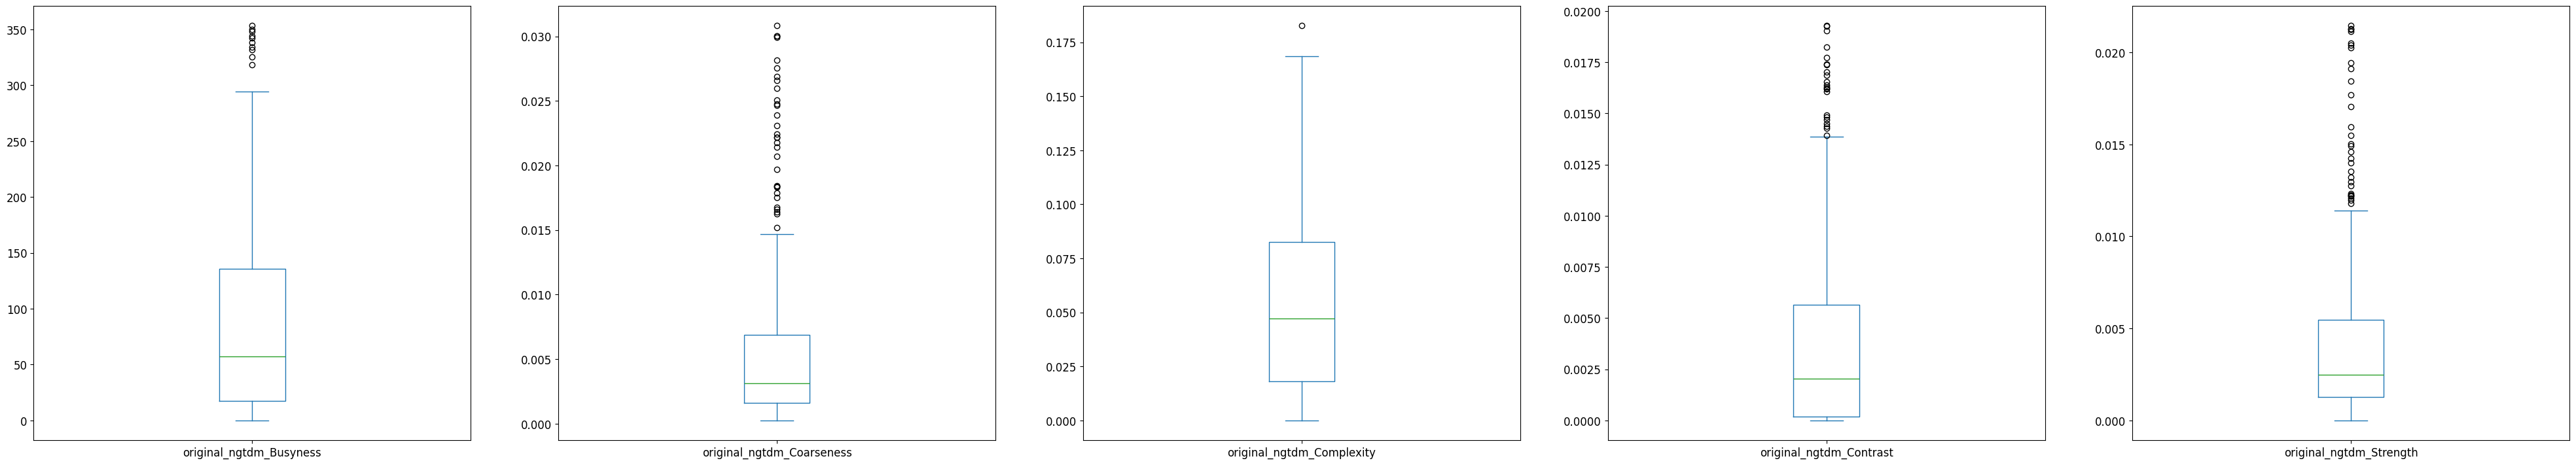

In [ ]:
df_prep[MRI_group_dict["original_ngtdm"]].plot(
    kind="box",
    subplots=True,
    layout=(5, 5),
    sharex=False,
    sharey=False,
    fontsize=12,
    figsize=(50, 50),
)

<Axes: title={'center': 'Feature Correlation'}>

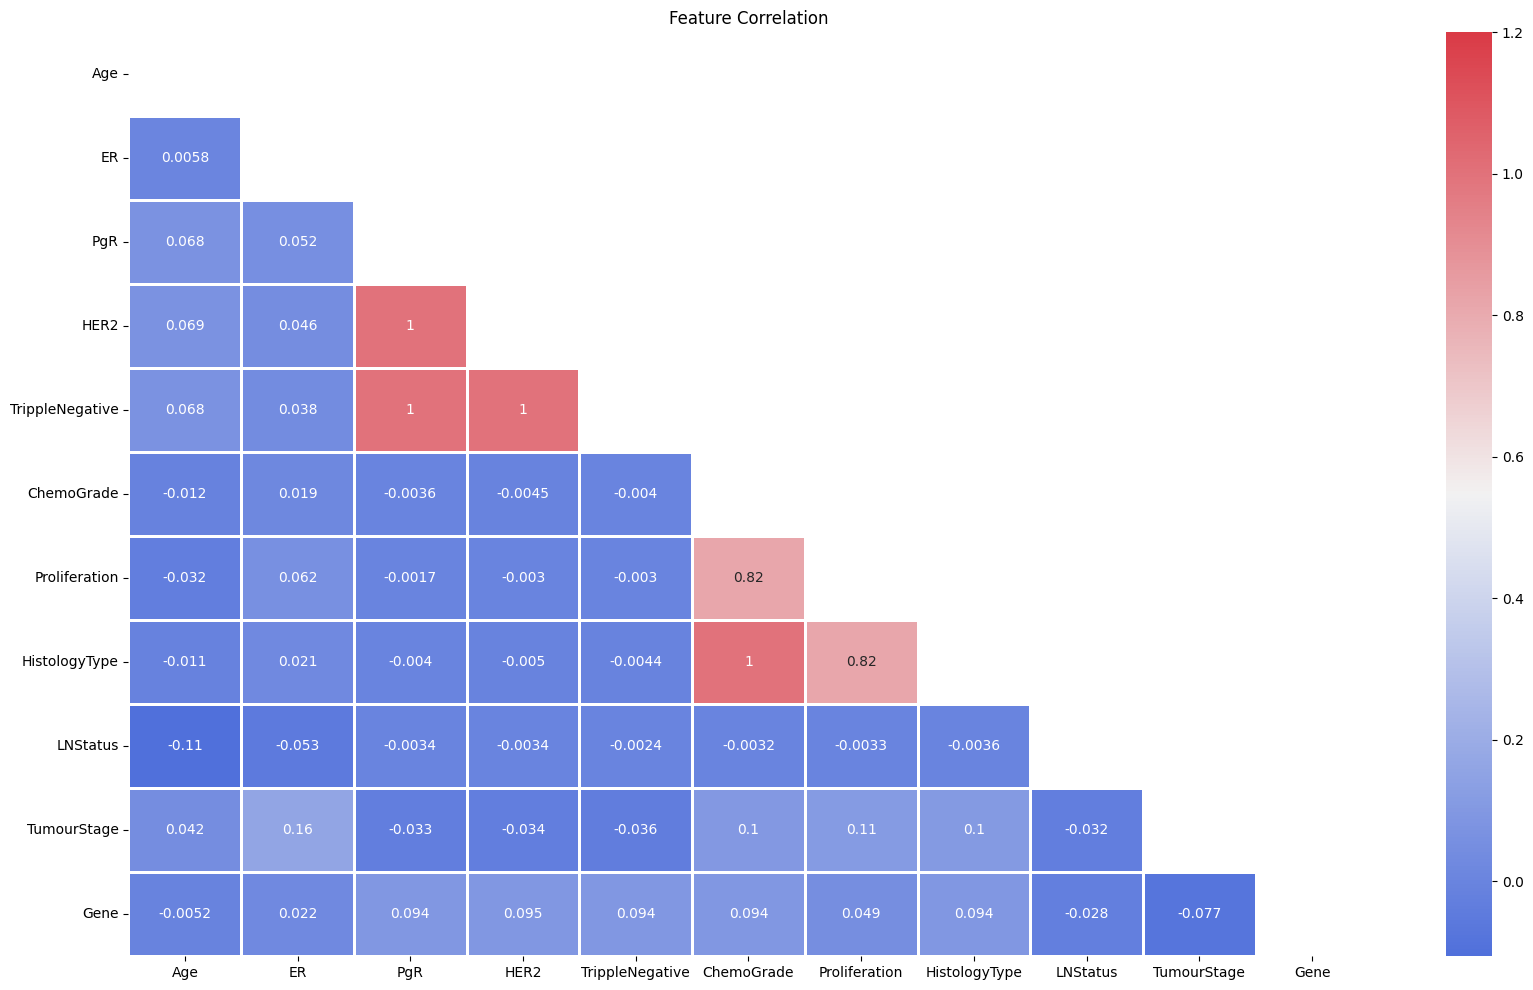

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corrMatt = df_prep[clinical_features].corr(numeric_only=True)
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Feature Correlation")
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(
    corrMatt,
    vmax=1.2,
    square=False,
    cmap=cmap,
    mask=mask,
    ax=ax,
    annot=True,
    fmt=".2g",
    linewidths=1,
)

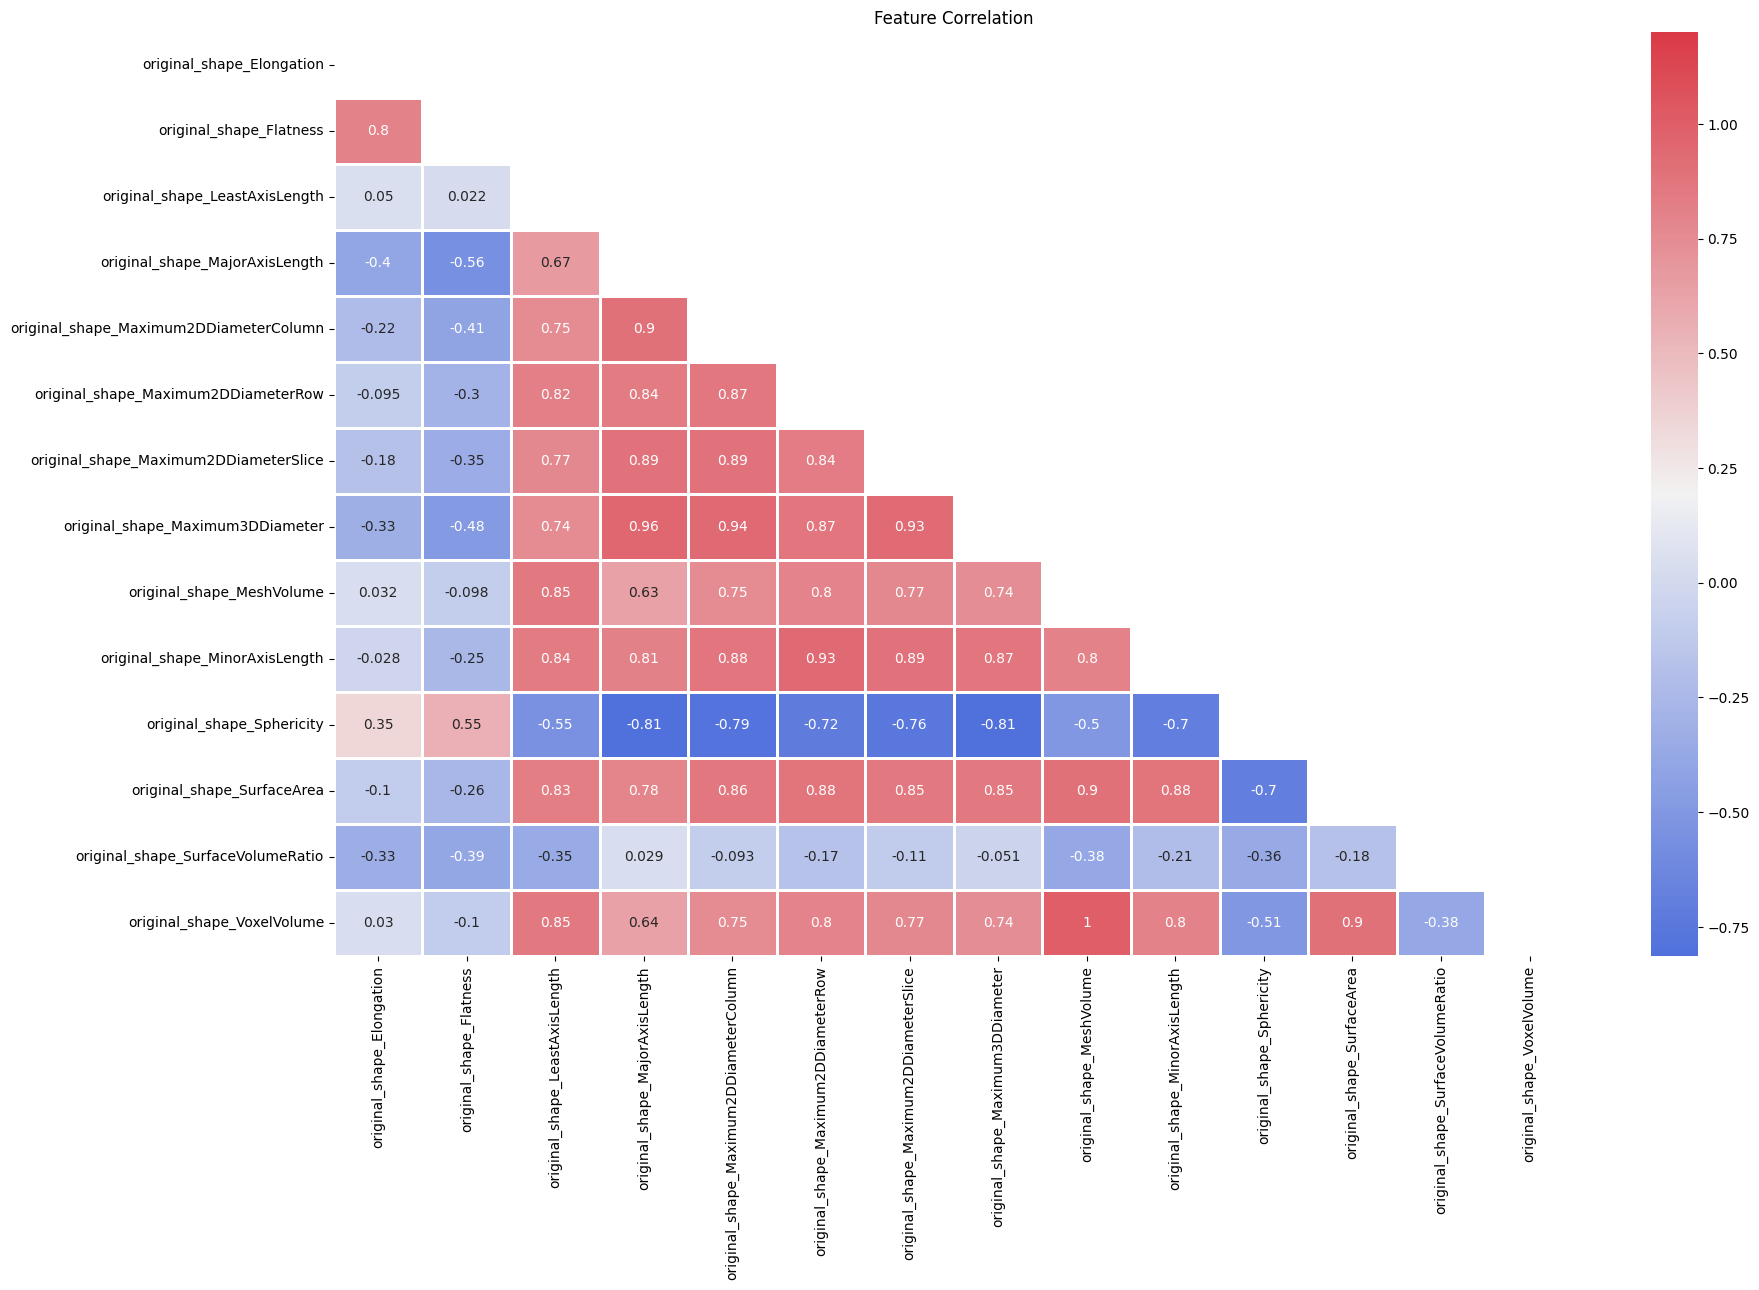

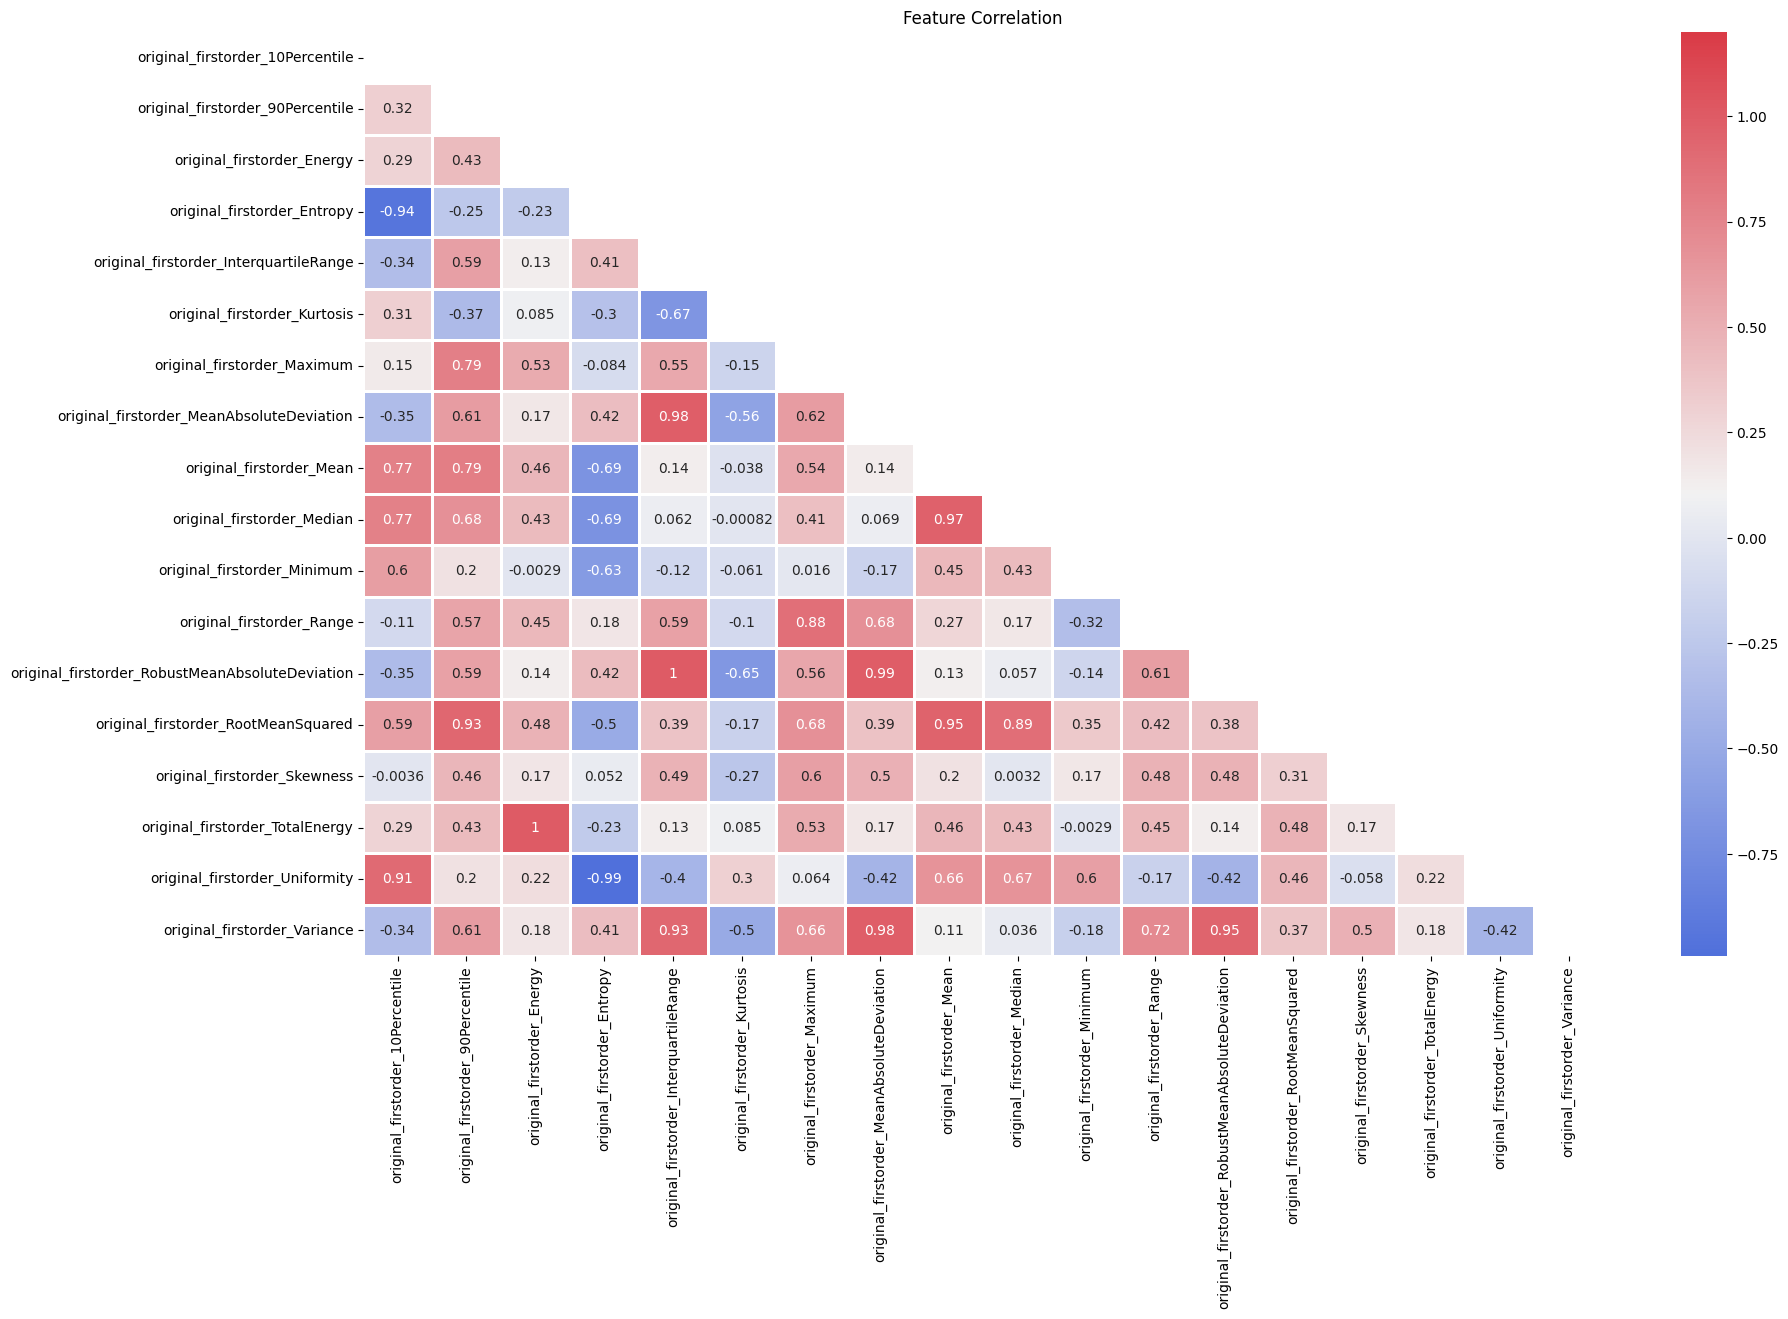

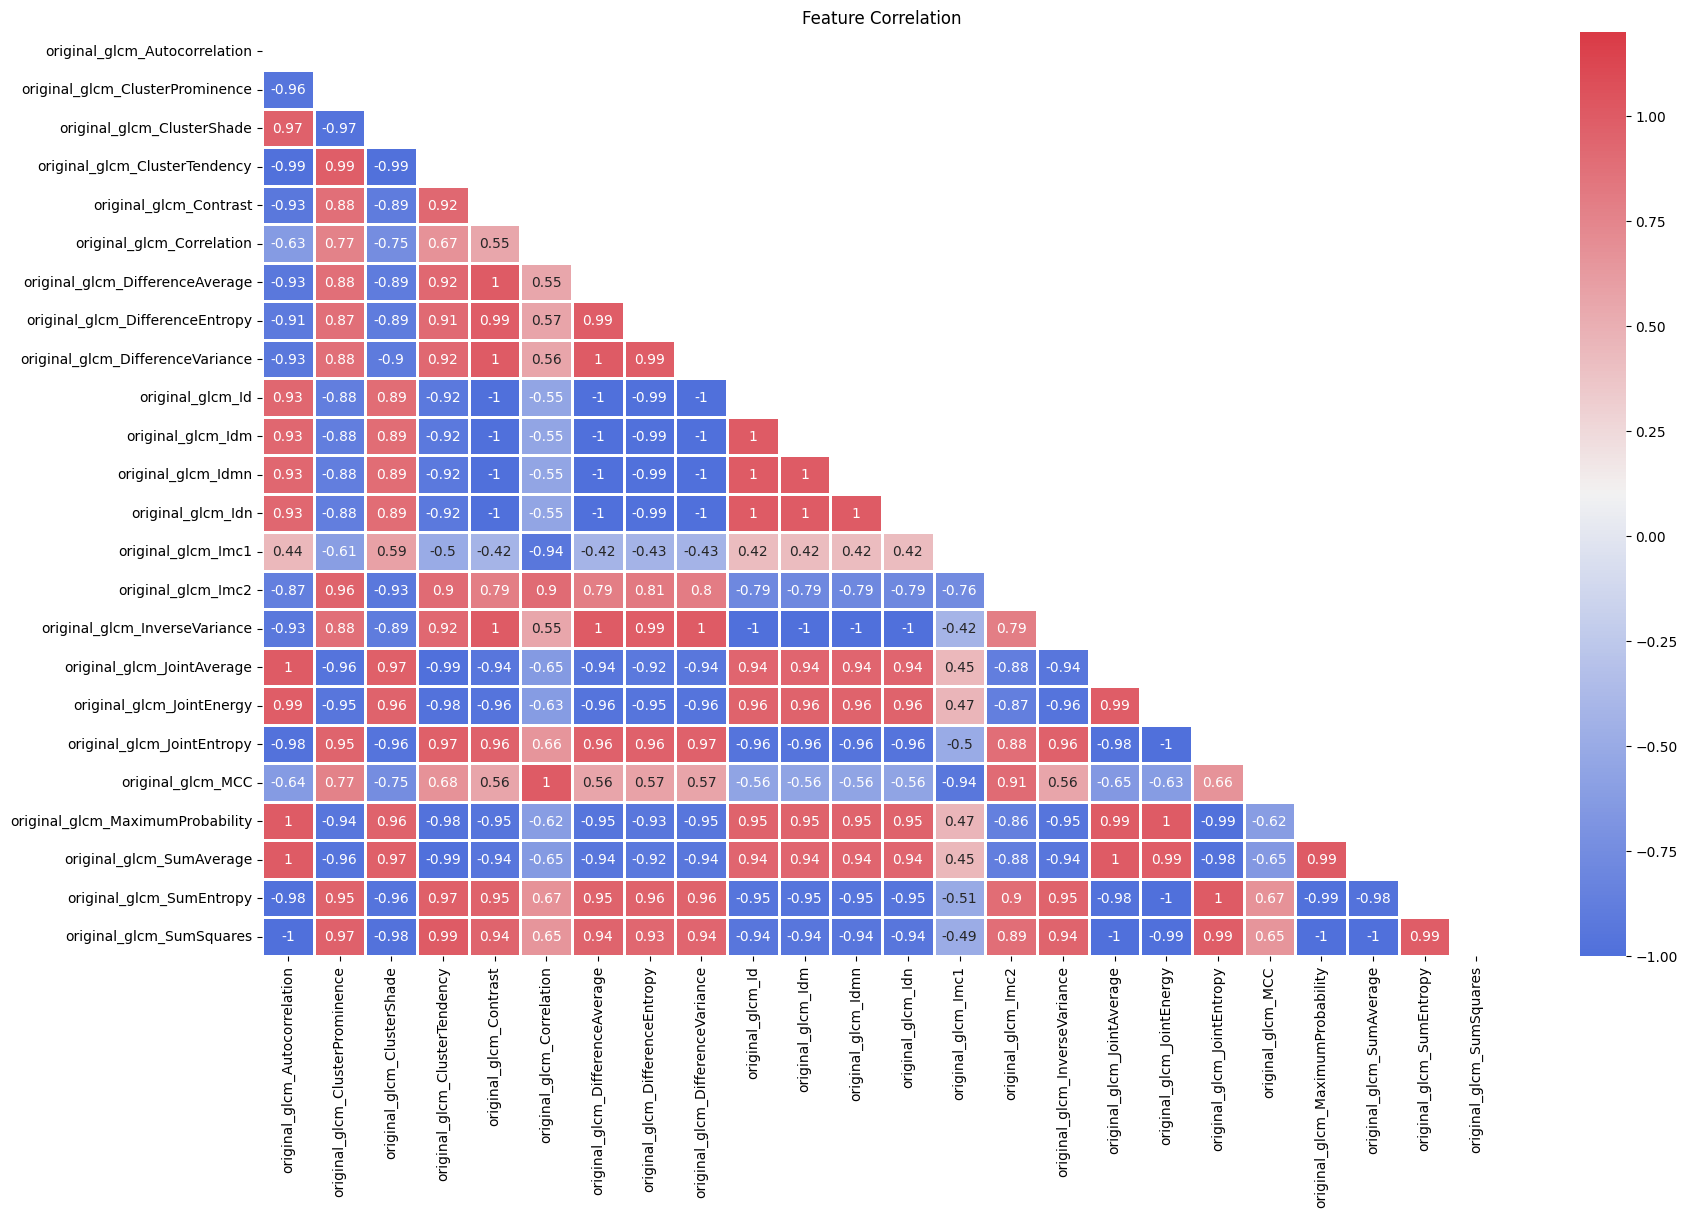

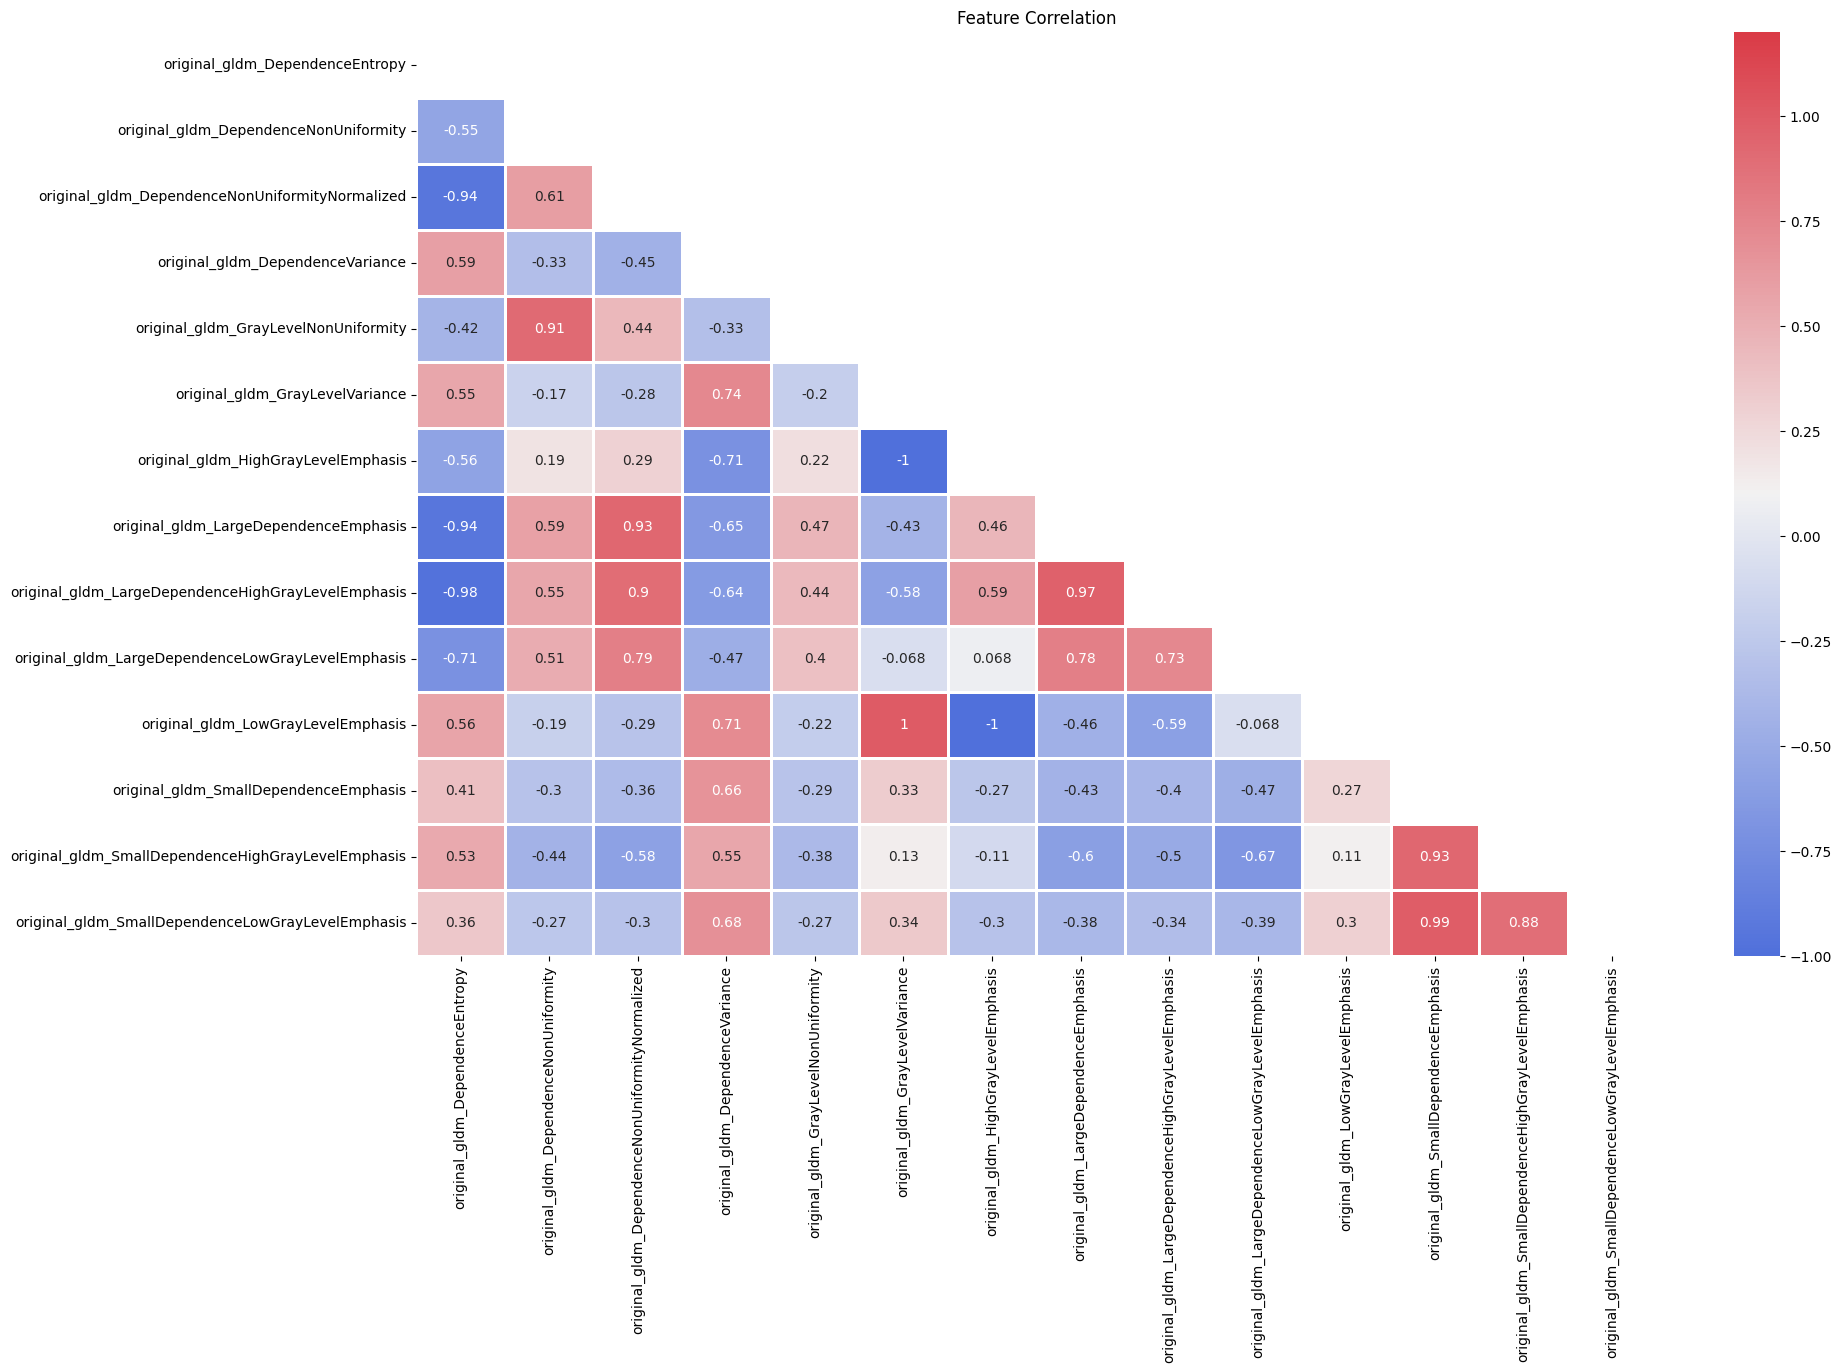

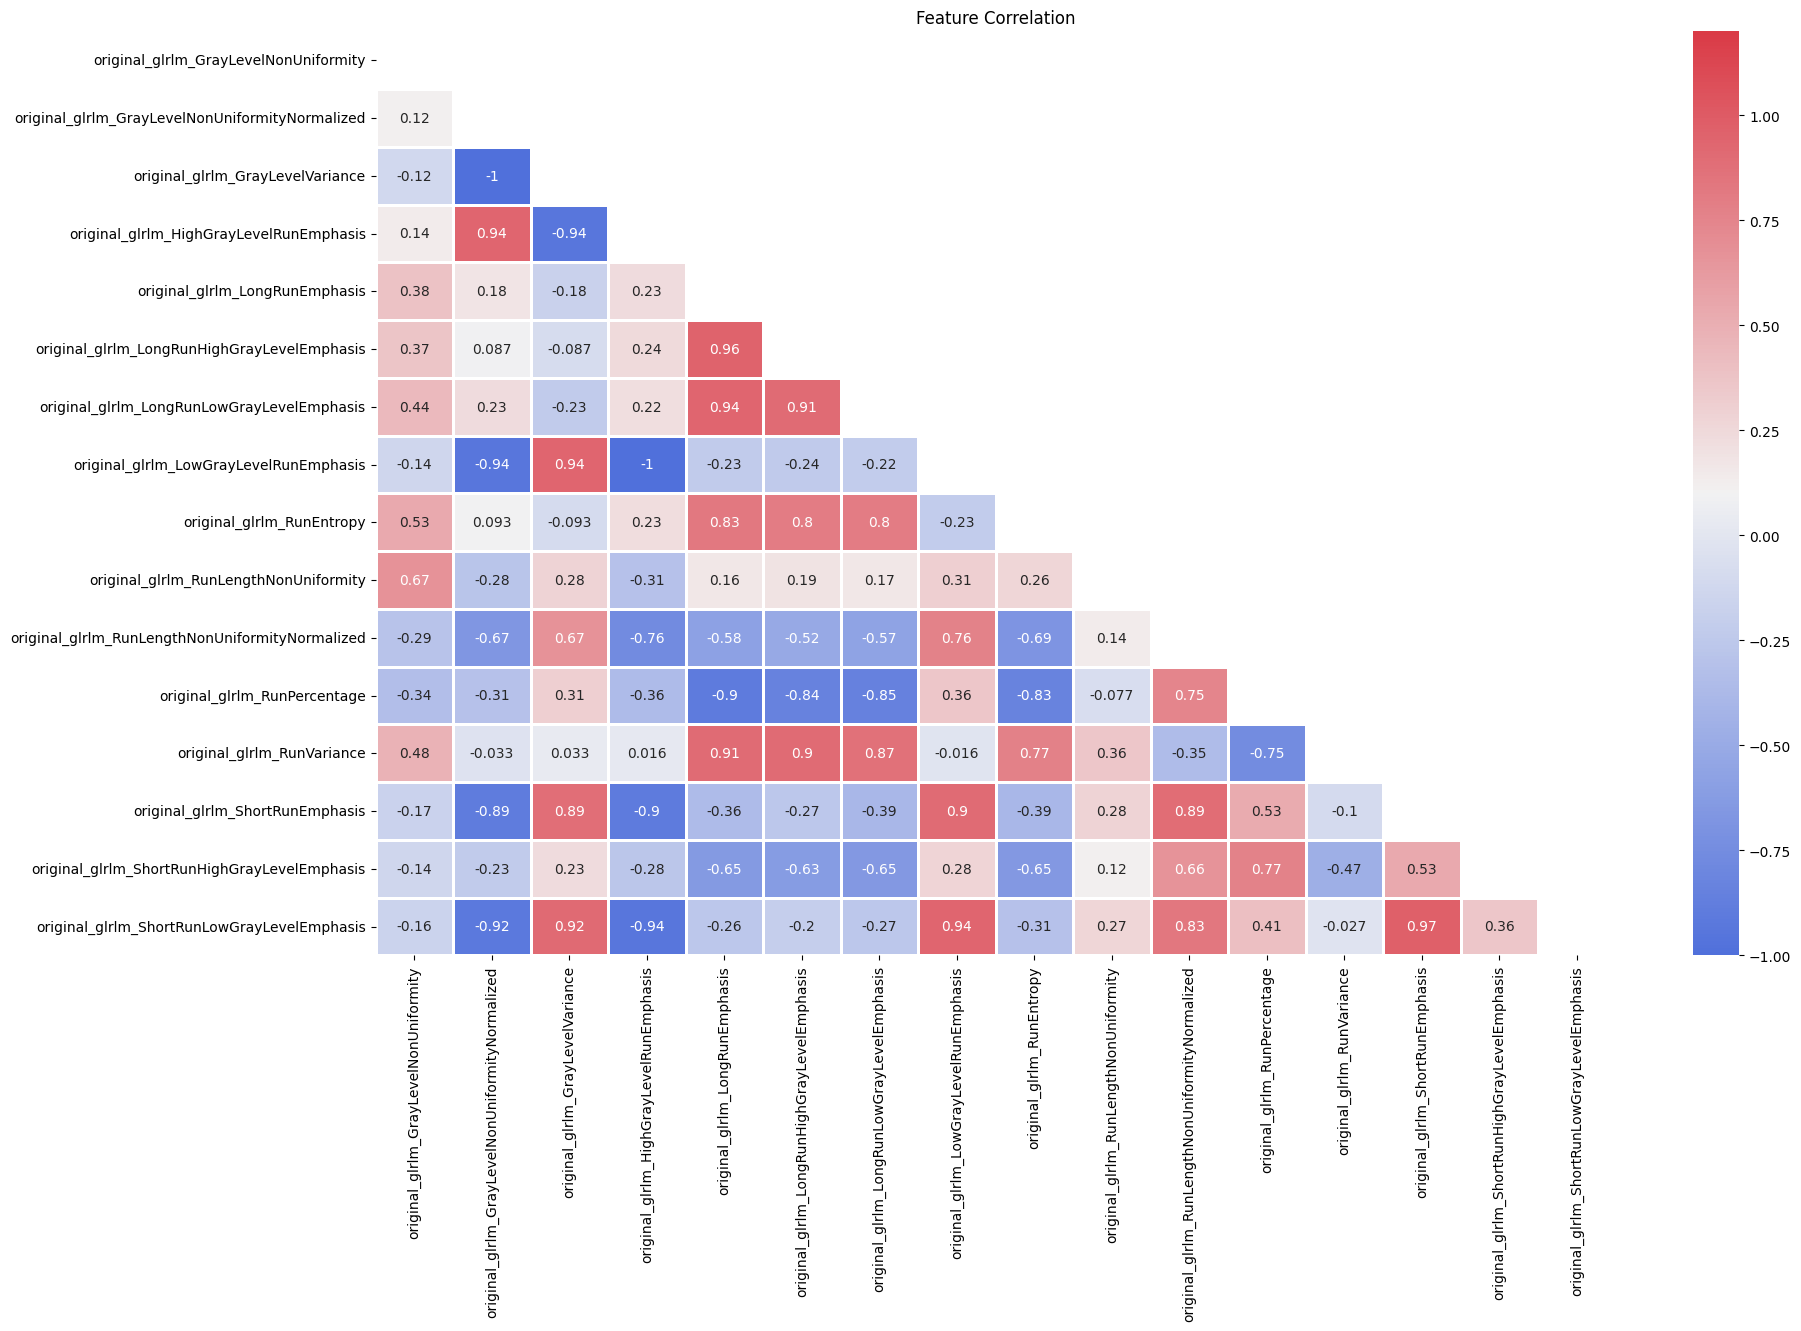

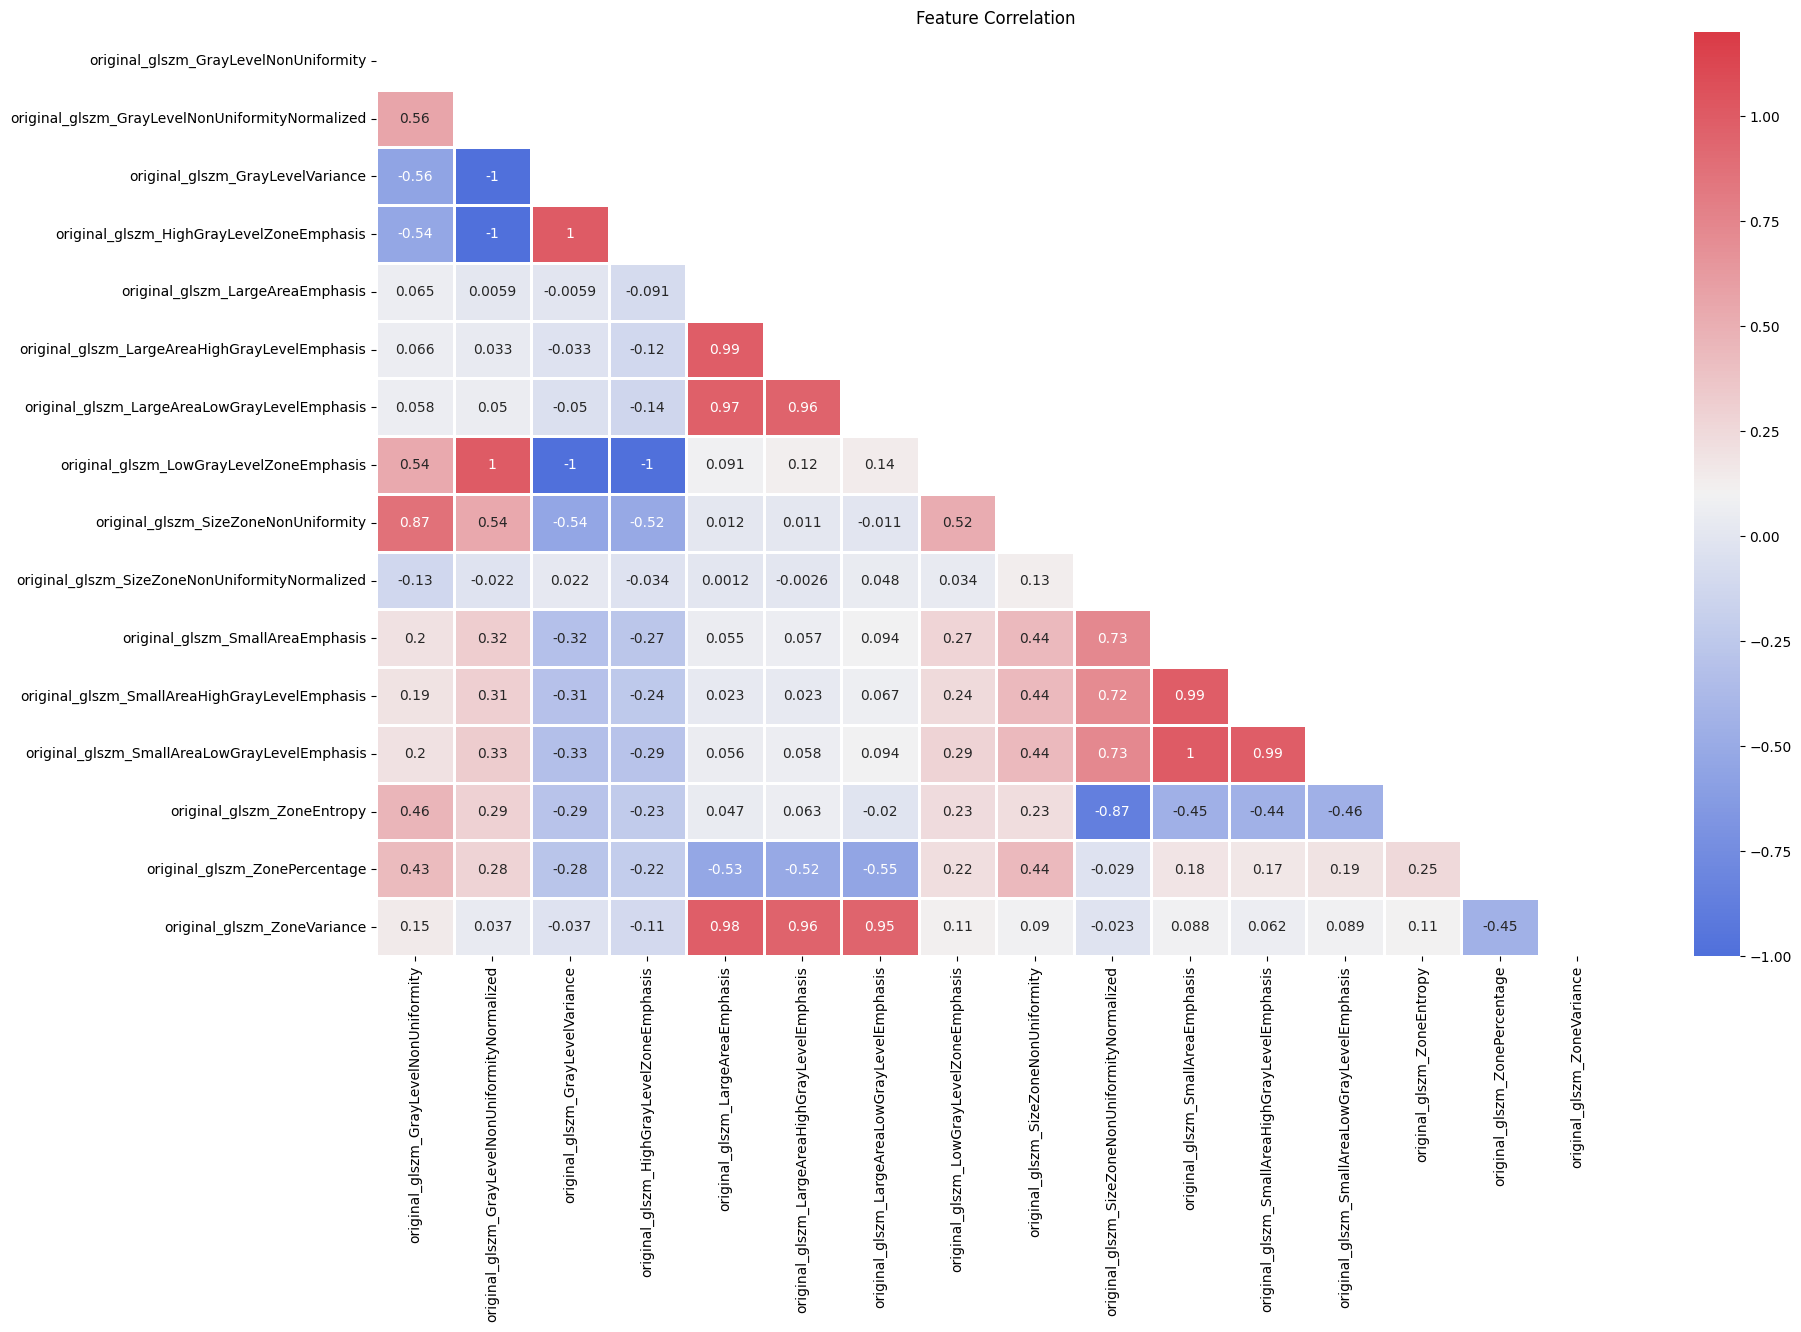

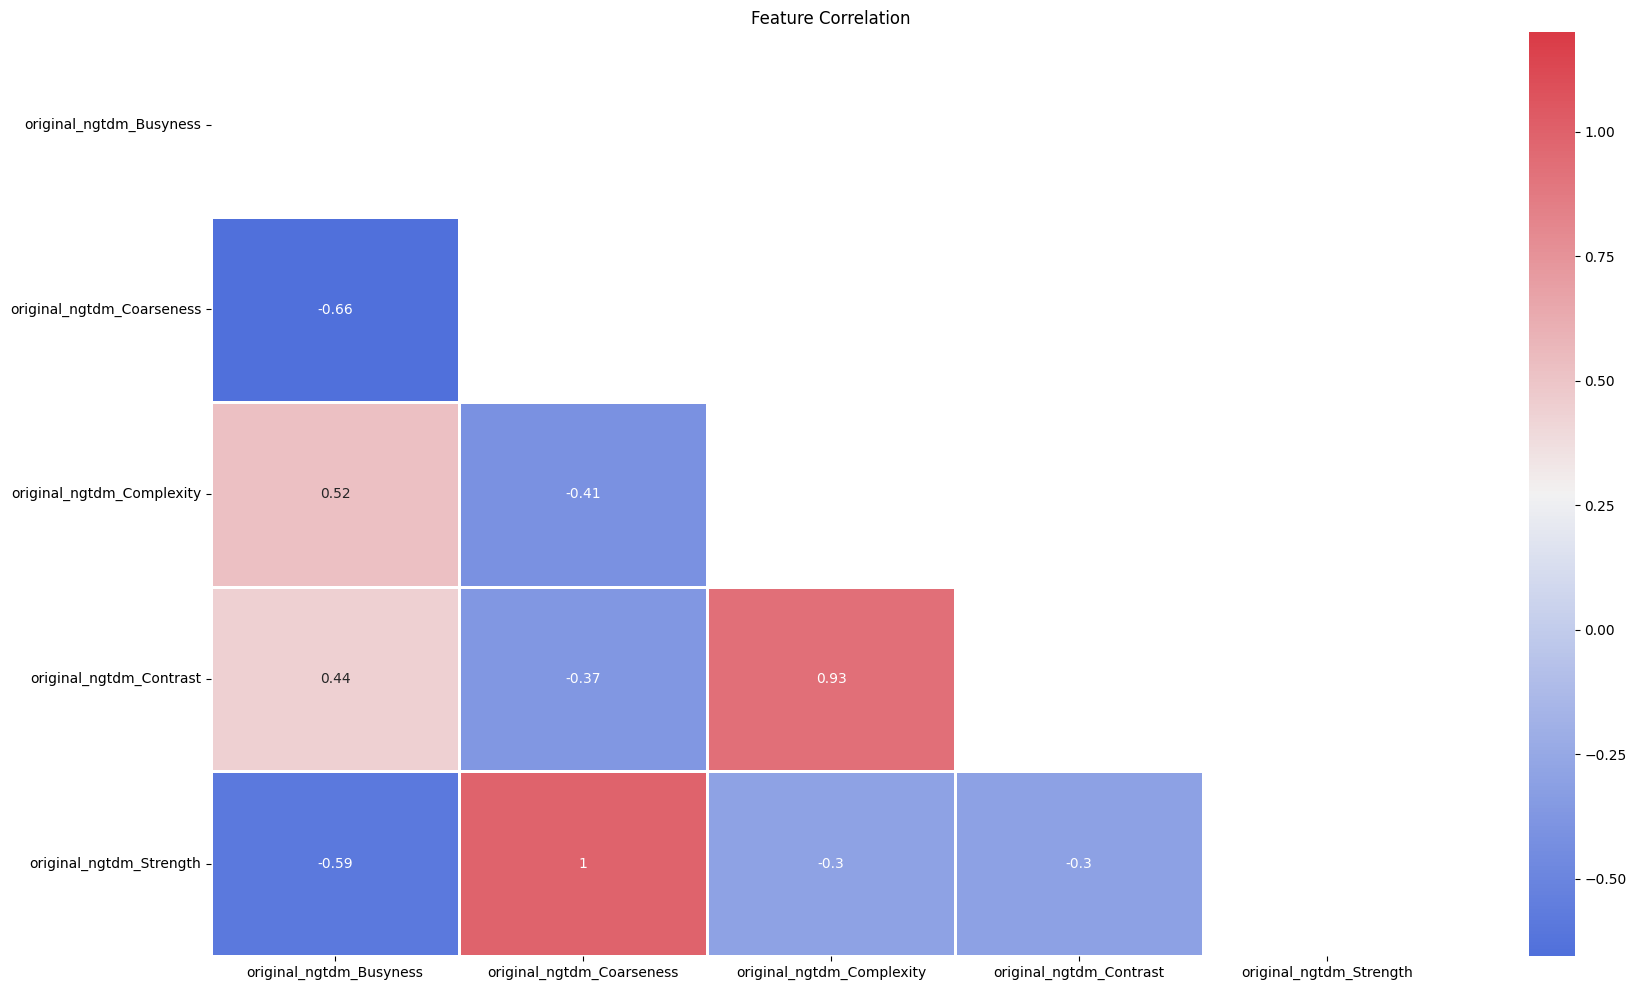

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for k, group in MRI_group_dict.items():
    corrMatt = df_prep[group].corr(numeric_only=True)
    mask = np.zeros_like(corrMatt)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 12))
    plt.title("Feature Correlation")
    cmap = sns.diverging_palette(260, 10, as_cmap=True)
    sns.heatmap(
        corrMatt,
        vmax=1.2,
        square=False,
        cmap=cmap,
        mask=mask,
        ax=ax,
        annot=True,
        fmt=".2g",
        linewidths=1,
    )

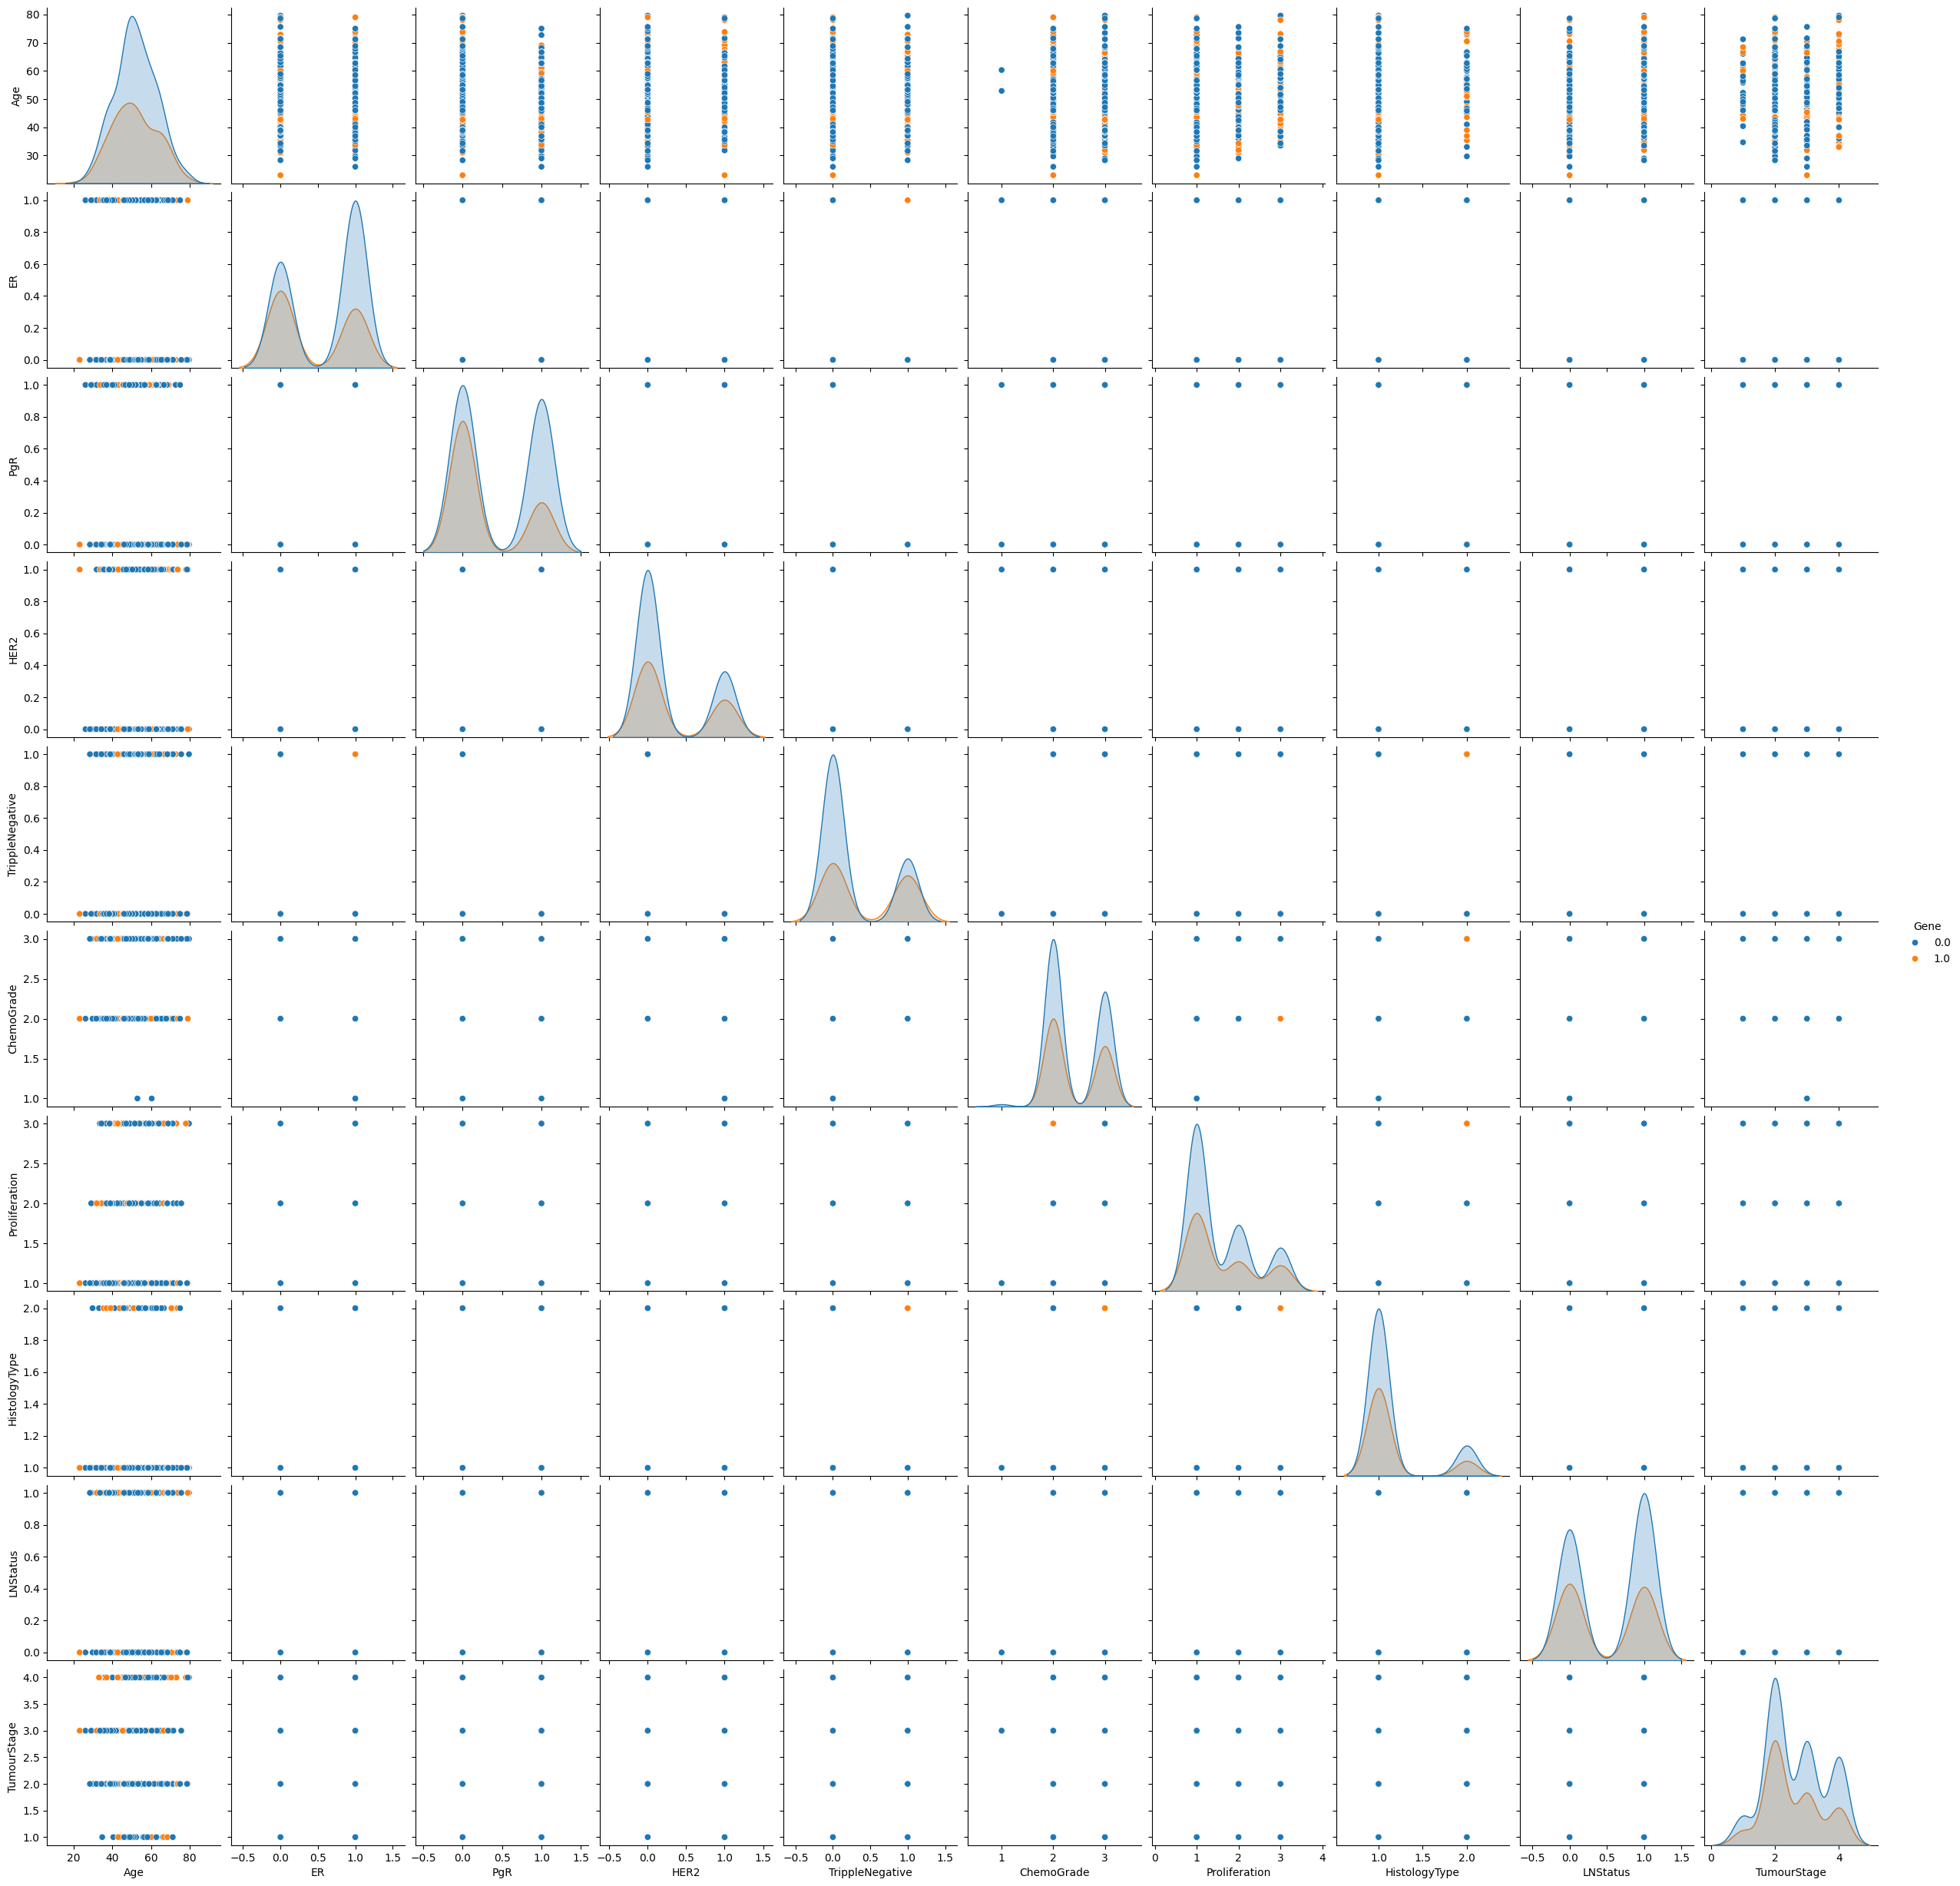

In [ ]:
sns.pairplot(df_prep[clinical_features], hue="Gene")

In [ ]:
for k, group in MRI_group_dict.items():
    sns.pairplot(df_prep[group + ["Gene"]], hue="Gene")

The classifier accuracy score of Random Forest is 0.72
[('Gene', 0.03607134352835868), ('original_glszm_SizeZoneNonUniformityNormalized', 0.023694509964590178)]
2


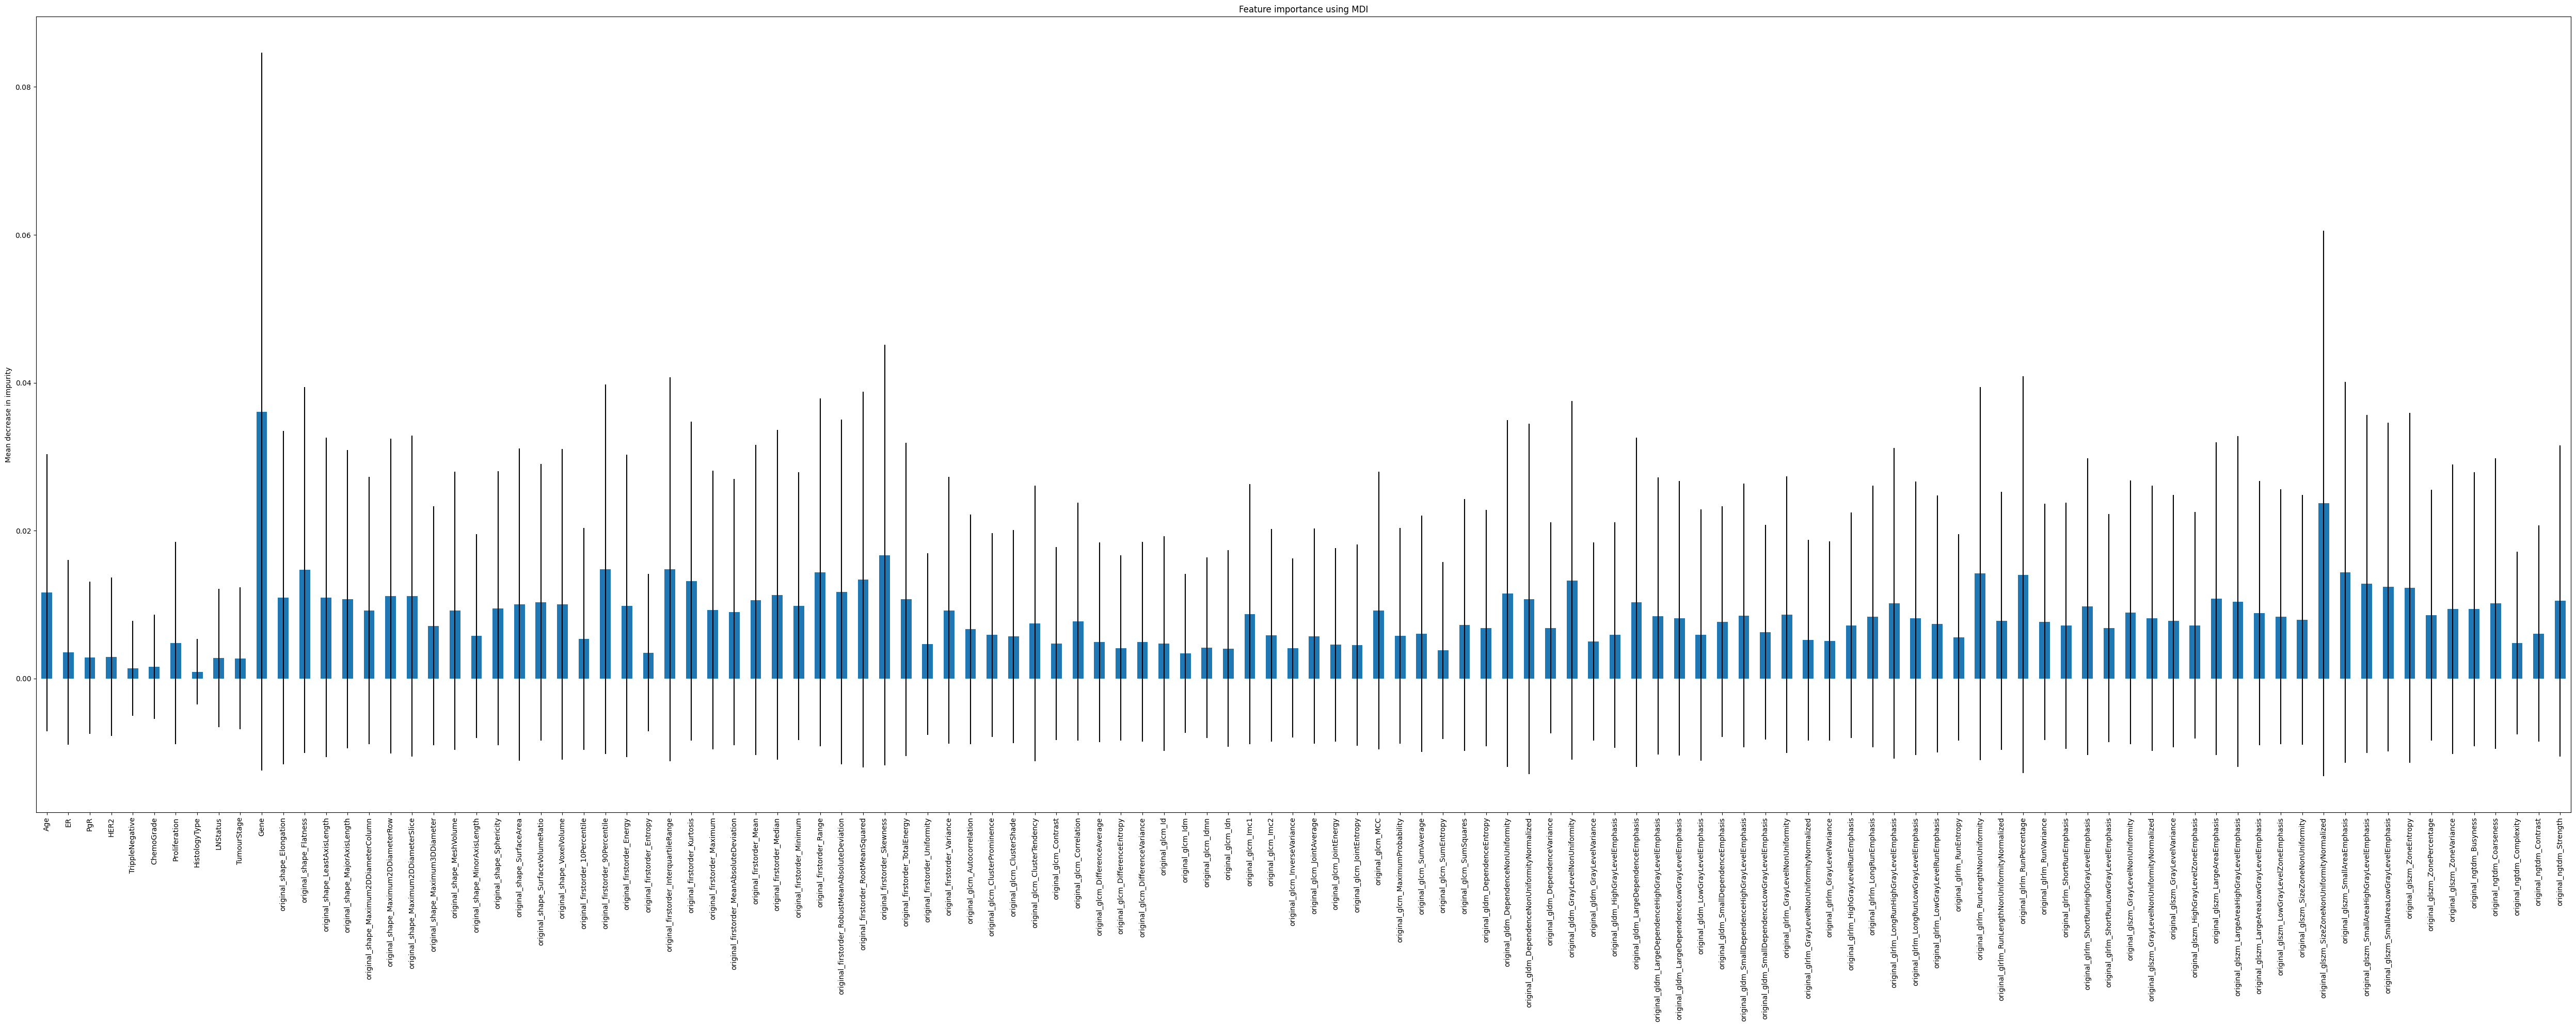

In [ ]:
# use random forest to find important features
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

y = df_prep[clf_output_column_name]
X = df_prep[features]

clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

rnd_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=100, n_jobs=-1, random_state=1
)

rnd_clf.fit(clf_X_train, clf_y_train)
y_pred_rf = rnd_clf.predict(clf_X_test)
classifier_score = rnd_clf.score(clf_X_test, clf_y_test)
print(
    "The classifier accuracy score of Random Forest is {:03.2f}".format(
        classifier_score
    )
)

feature_score = [
    (features[i], score) for i, score in enumerate(rnd_clf.feature_importances_)
]
feature_score.sort(key=lambda x: x[1], reverse=True)
max_score = feature_score[0][1]

top_features = [feature for feature in feature_score if feature[1] > max_score * 0.5]
print(top_features)
print(len(top_features))

importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
feature_names = features
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(50, 20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()